# CFEP3. A criterion for eigenvectors

In the previous notebooks we noted that it is important to optimally select reaction coordinates (RC) for accurate description of projected dynamics by diffusive models. The committor function is an important example of optimal RC. The eigenvectors (EVs) of the transfer operator are another example [1]. They have  the advantage of not requiring the specification of boundary nodes, which can be difficult for complex systems.


In this notebook we will consider a validation/optimality criterion for eigenvectors, constructed from cut profiles. It is a generalization of the $Z_{C,1}$ criterion for the committor function considered before. The equations for an eigenvector and the committor functions have a similar generic form. The specific difference leads to a modification of the criterion. The criterion equals to the ($-\ln$ of the) ratio of two cut profiles:

$$\theta(x,\Delta t)=-\ln\frac{Z_{C,1}(x,\Delta t)}{(1-e^{-\mu \Delta t})Z_{C,1}^0(x,\Delta t)},$$

here, $\mu$ is the corresponding eigenvalue, $Z_{C,1}$ is the standard cut profile, while $Z_{C,1}^0$ is the cut profile computed in the following way: for every transition from $r(t) \rightarrow r(t+\Delta t)$ in the trajectory, one makes following transitions $r(t)\rightarrow 0\rightarrow r(t+\Delta t)$, and then computes $Z_{C,1}$ for such modified trajectory. Or, alternatively, for every point in the time-series $r(k\Delta t)$  one considers transitions $0\rightarrow r(k\Delta t) \rightarrow 0$. For details and derivation see [1]


### validation criterion

If putative RC time-series $u(i\Delta t)$ closely approximates eigenvector $u$ and corresponding eigenvalue $\mu$, then $\theta(x,\Delta t)\approx 0$ for all $x$ and $\Delta t$.

### optimality criterion

For a sub-optimal RC time-series, $\theta(x,\Delta t)$ generally is smaller than zero. And the larger the difference $\theta(x,\Delta t_1) - \theta(x,\Delta t_2)$ for $\Delta t_1>\Delta t_2$ the less optimal the RC time-series is around $x$.

<details>
<summary>

#### click here to see some more math
</summary>

$Z_{C,1}^0(x,\Delta t)$ depends on $\Delta t$ in the simple way: $Z_{C,1}^0(x,\Delta t)=Z_{C,1}^0(x,1)/\Delta t$.

An accurate estimate of $\mu$ can be obtained from the eigenvector time-series $\mu=-\ln C(u,\Delta t_{inf})/\Delta t_{inf}$, where $C(u,\Delta t)=\langle u(t+\Delta t)u(t)\rangle /\langle u^2(t)\rangle$. If the putative RC time-series closely approximates an eigenvector, then the precise choice of $\Delta t_{inf}$ is not important. If the putative RC is not a very accurate approximation of an eigenvector, then large values of $\Delta t_{inf}$ may mask deficiencies of the RC. However, very large values of $\Delta t_{inf}$, may make precise estimation of the exponentially small value of $C(u,\Delta t)$, which scales as $\exp(-\mu \Delta t)$ difficult; one may need a much longer trajectory.

Below we illustrate the usage of the criterion on the model systems and a protein folding trajectory. First we need to import some function from the math module and cfep library.

In [1]:
from math import sin,cos,pi,log,exp
from cfeplib import comp_diffusion_euler

In [2]:
def f(x): return 0

def D(x): return 1

dt=0.001
traj=comp_diffusion_euler(f,D,dt,10000000)

We first consider free diffusion. We compute timeseries of brownian motion with $\Delta t=0.001$. Eigenvectors for free diffusion are simple $\sin(kx)$ and $\cos(kx)$ for any $k$. Consider for example $v(x)=\cos(\pi x)$. We project the computed trajectory on the eigenvector, by computing the value of eigenvector for every trajectory frame.

In [3]:
ev1=[cos(x*pi) for x in traj]

We import function comp_eval that estimates the corresponding eigenvalue, and consider the estimate for a range of $\Delta t_{inf}=1,2,4,...,2^{10}$.

In [4]:
from cfeplib import comp_eval

ldt=[2**i for i in range(11)]
for dt in ldt:
    try: print (dt,comp_eval(ev1,dt)/.001) # divide by dt=0.001 of the diffusion trajectory timestep
    except: pass

1 9.922868874054911
2 9.924607157647538
4 9.923332214629955
8 9.911547950526678
16 9.910223006493464
32 9.922000451939931
64 9.945786402348915
128 9.945153024933607
256 9.958470178234
512 9.469457153230648
1024 6.452900316810785


As one can see the estimates of the eigenvalue are rather close to the theoretical value of $\pi^2 \approx 9.8696$. Only estimates with $\Delta t>256$ start to show large fluctuations. We take as 32 as the optimal choice for $\Delta t_{inf}$.

Next we import function comp_theta. It computes $Z_{C,1}^0$ internally.

(-0.02, 0.02)

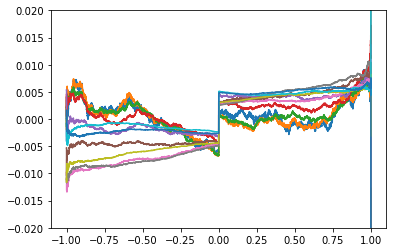

In [5]:
from cfeplib import comp_theta
lx,ltheta=comp_theta(ev1,ldt,tinf=32,dx=0.0001)
%matplotlib inline
import matplotlib.pyplot as plt
for ly in ltheta:
    plt.plot(lx,ly)
plt.ylim((-0.02,0.02))

As expected the $\theta$ criterion fluctuates around zero; it is bounded by $\pm 0.01$, which means that the computed time-series closely approximates an eigenvector.

To illustrate the behavior of the criterion on a coordinate different from an eigenvector, we consider a superposition of two eigenvectors $\cos(\pi x)+0.5 \cos(5\pi x)$. First we consider the dependence of the estimated $\mu$ on the sampling interval $\Delta t$.

In [6]:
ev12=[cos(x*pi)+0.5*cos(x*5*pi) for x in traj]
for dt in ldt:
    try: print (dt,comp_eval(ev12,dt)/0.001)
    except: pass

1 53.0924290726325
2 49.236309363127965
4 42.64417470944385
8 33.18273507082502
16 23.50434861657374
32 16.909767564286657
64 13.420496294084854
128 11.679571180836207
256 10.836453792667433
512 10.094676654377137
1024 8.21225879083375


As the $\Delta t$ increases the contribution from the second eigenvector decreases (exponentially). In particular estimate for $\Delta t=512$ is rather close to the true value.

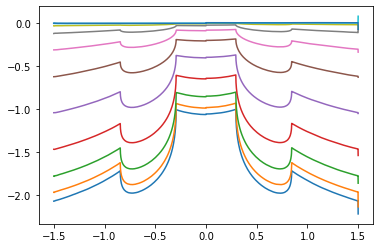

In [7]:
lx,ltheta=comp_theta(ev12,ldt,tinf=512,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)

The criterion shows that the putative RC is very suboptimal and that with $\Delta t$ increasing it is becoming less suboptimal, i.e., for the last few values of $\Delta t$ $\theta(x,\Delta t)\approx 0$.

Next we consider the Ornstein–Uhlenbeck process, i.e., diffusion in the force field  $f(x)=-x$. The eigenvectors of the transfer operator are the Hermite polynomials, with the first few being: 1, x, 1-x^2.

In [9]:
def f(x): return -x

def D(x): return 1

dt=0.01
traj=comp_diffusion_euler(f,D,dt,10000000)

Validation of the first eigenvector:

1 0.010004840336797587
2 0.010007616184903022
4 0.010004599779620194
8 0.009997932155380841
16 0.009999129095692684
32 0.009992170955688865
64 0.010005561831509004
128 0.010020769216111254
256 0.009923830019365342
512 0.009733636815633133


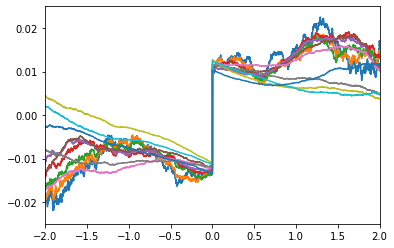

In [10]:
ev1=[x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev1,dt))
    except: pass

lx,ltheta=comp_theta(ev1,ldt,tinf=64,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-2,2)
_=plt.ylim(-0.025,0.025)

Here we need to limit the range of x considered because for large $x$ the sampling is very limited due to large $U(x)$, and statistical errors in estimations of cut profiles are large. $\theta(x\Delta t)\approx 0$ for $|x|<2$.

Validation of the second eigenvector

1 0.020200437047573835
2 0.020189739959035485
4 0.02016755090676485
8 0.020136180410443596
16 0.020135645744539882
32 0.02014175641103389
64 0.020201333682079162
128 0.020230976848880873
256 0.0186268726105488


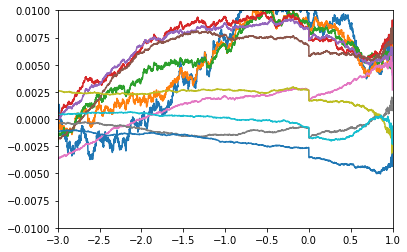

In [11]:
ev2=[1-x*x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev2,dt))
    except: pass

lx,ltheta=comp_theta(ev2,ldt,tinf=16,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-3,1)
_=plt.ylim(-0.01,0.01)

For the superposition of the first two eigenvectors we obtain result similar to the above: the obtained times series is far from being optimal; it becomes more optimal if considered at large timescale, where contribution of the second eigenvector decreases exponentially.

1 0.01699696290632811
2 0.01697339189392845
4 0.016932160865512864
8 0.016869632023008296
16 0.016778462930940204
32 0.01659969271638908
64 0.016298273165857524
128 0.01547552239665569
256 0.01332828134150479
512 0.011226955800544723


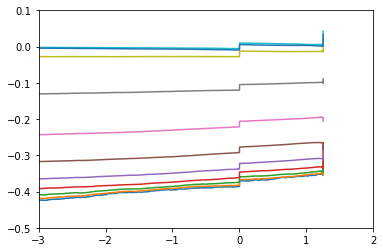

In [12]:
ev12=[1-x*x+x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev12,dt))
    except: pass

lx,ltheta=comp_theta(ev12,ldt,tinf=512,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-3,2)
_=plt.ylim(-0.5,0.1)

While here we illustrated the criterion on the one-dimensional stochastic processes, the criterion is equally applicable to the putative time-series describing multidimensional processes.

### Eigenvectors of protein folding dynamics
To illustrate the criterion on a more realistic example we consider two RCs approximating first and second eigenvectors of protein folding dynamics, namely, the HP35 double mutant trajectory reported by D. Shaw [2]. The eigenvectors were obtained with a nonparametric approach as described in [1].

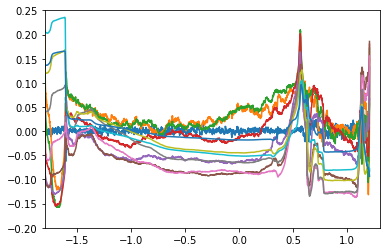

In [13]:
# load eigenvectors
import numpy as np
evs=np.load('2f4k.npz')['evs']

ldt=[2**i for i in range(11)]
lx,ltheta=comp_theta(evs[:,0],ldt,tinf=1024,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-1.8,1.3)
_=plt.ylim(-0.2,0.25)

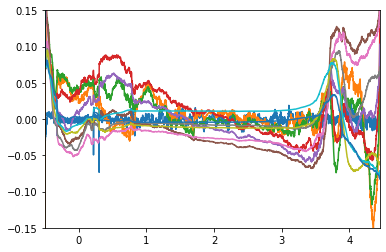

In [14]:
lx,ltheta=comp_theta(evs[:,1],ldt,tinf=1024,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-0.5,4.45)
_=plt.ylim(-0.15,0.15)


The values of the $\theta$ function are around zero, close to the range of expected statistical fluctuations, validating that the two determined RCs closely approximate the eigenvectors.

[1] S. Krivov, Blind analysis of molecular dynamics 2020, [arXiv:2005.02782](https://arxiv.org/abs/2005.02782)

[2] Piana, S.; Lindorff-Larsen, K.; Shaw, D. E. Protein folding kinetics and thermodynamics from atomistic simulation. [*Proc. Natl. Acad. Sci. U. S. A.* 2012, **109**, 17845–17850](https://www.pnas.org/content/109/44/17845)